In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\Stuart_bm\Stuart_bmcite_RNAassay_original.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata = sc.read_h5ad(dataset_dir / 'Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata.shape

(30672, 17009)

In [4]:
adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508


In [5]:
# Level1
labels = adata.obs['celltype.l1'].tolist()
types = np.unique(labels).tolist()
types

['B cell', 'Mono/DC', 'NK', 'Progenitor cells', 'T cell']

## Read annotation result from SingleR (Level: Main)

In [5]:
pred_l1 = pd.read_csv('CellAssign_DEGmedian_pred_Stuart_L1.csv', index_col=0)
pred_l1.head()

,B cell,Mono/DC,NK,Progenitor cells,T cell
a_AAACCTGAGCTTATCG-1,5.037384e-58,1.912004e-56,6.160752e-61,1.000000e+00,4.880447e-37
a_AAACCTGAGGTGGGTT-1,8.313761e-20,1.702940e-18,3.258475e-16,3.468014e-12,1.000000e+00
a_AAACCTGAGTACATGA-1,6.823657e-23,3.713886e-27,1.982696e-18,4.385541e-21,1.000000e+00
a_AAACCTGCAAACCTAC-1,3.187130e-32,8.399880e-36,4.000401e-26,1.513906e-29,1.000000e+00
a_AAACCTGCAAGGTGTG-1,1.433982e-202,1.000000e+00,1.765108e-189,3.200239e-197,3.267115e-206


In [7]:
# Assign prediction celltype by score
largest_values = []
largest_columns = []
assignments = []
for index, row in pred_l1.iterrows():
    # find largest value and their corresponding columns
    largest_value = row.max()
    largest_column = row.idxmax()
    largest_values.append(largest_value)
    largest_columns.append(largest_column)

    assign = largest_column
    assignments.append(assign)

# result_df = pd.DataFrame({'Largest Value': largest_values, 'Largest Column': largest_columns, 'Assignment': assignments})
# result_df.shape
pred_l1['Assignment'] = assignments
pred_l1.head()


,B cell,Mono/DC,NK,Progenitor cells,T cell,Assignment
a_AAACCTGAGCTTATCG-1,5.037384e-58,1.912004e-56,6.160752e-61,1.000000e+00,4.880447e-37,Progenitor cells
a_AAACCTGAGGTGGGTT-1,8.313761e-20,1.702940e-18,3.258475e-16,3.468014e-12,1.000000e+00,T cell
a_AAACCTGAGTACATGA-1,6.823657e-23,3.713886e-27,1.982696e-18,4.385541e-21,1.000000e+00,T cell
a_AAACCTGCAAACCTAC-1,3.187130e-32,8.399880e-36,4.000401e-26,1.513906e-29,1.000000e+00,T cell
a_AAACCTGCAAGGTGTG-1,1.433982e-202,1.000000e+00,1.765108e-189,3.200239e-197,3.267115e-206,Mono/DC


In [8]:
pred_types_l1 = np.unique(pred_l1['Assignment']).tolist()
pred_types_l1

['B cell', 'Mono/DC', 'NK', 'Progenitor cells', 'T cell']

In [9]:
true_labels = adata.obs['celltype.l1']
predicted_labels = pred_l1['Assignment']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['CellAssign predicted'], margins=False)
# col_order = cm.columns.tolist()
# col_order.append(col_order.pop(col_order.index('Basophils')))
# cm = cm.reindex(col_order, axis=1)
cm

CellAssign predicted,B cell,Mono/DC,NK,Progenitor cells,T cell
True,,,,,
B cell,3676,8,8,1,60
Mono/DC,49,7414,211,43,12
NK,0,11,1381,1,17
Progenitor cells,67,784,23,1871,134
T cell,6,24,2329,26,12516


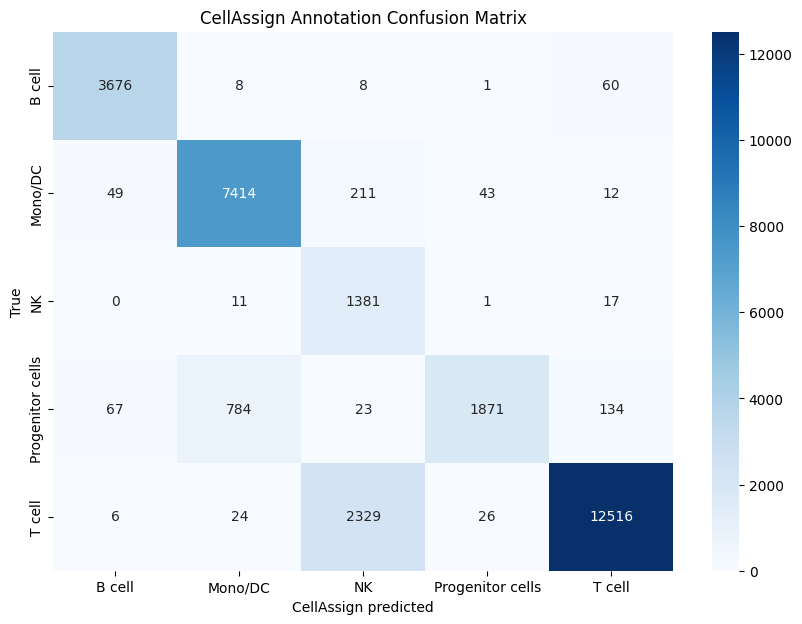

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CellAssign Annotation Confusion Matrix')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

method = ['micro', 'macro', 'weighted']
for m in method:
    precision = precision_score(true_labels, predicted_labels, average=m)
    print(f"{m} Precision:", precision)
    f1 = f1_score(true_labels, predicted_labels, average=m)
    print(f"{m} F1 Score:", f1)

Accuracy: 0.8756520605112155
micro Precision: 0.8756520605112155
micro F1 Score: 0.8756520605112155
macro Precision: 0.8325807410753633
macro F1 Score: 0.8198149211975856
weighted Precision: 0.9289396630004281
weighted F1 Score: 0.8896173770163193


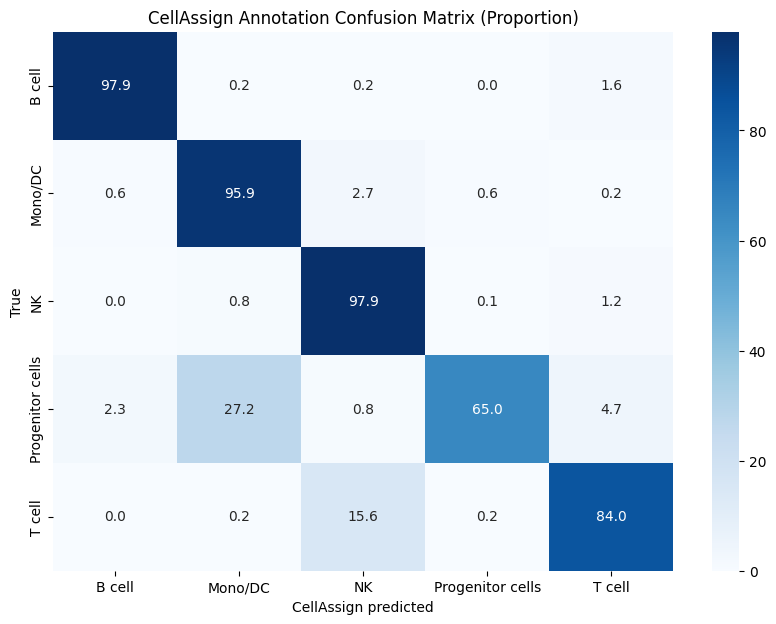

In [12]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('CellAssign Annotation Confusion Matrix (Proportion)')
plt.show()